# **Numerical** **Example**

**Objectives**: 

1.   Use Monte Carlo methods to simulate theoretical future stock prices.
2.   Observe the evolution of with profits accounting value provisions, i.e. $R_{t}+P_{t}$ with profits distributions $P_{t}>0 ~\forall~t\in [0,T]$.

3.   Observe the evolution of with profits fair value provisions, i.e. $R_{t}^{r}+P_{t}$ with profits distributions $P_{t}>0 ~\forall~t\in [0,T]$.








To create a Monte Carlo simulator, we perform the following steps;


*   Download closing prices of an asset.
*   Find the periodic daily returns.


*   We find the mean, variance, and standard deviation of the periodic daily returns.
*   We create a formula of a drift plus a random stochastic offset i.e. Geometric Brownian motion governing risky assets in this context.





First we import the necessary Libraries!

In [ ]:
import pandas as pd # It has a DataFrame class that allows you to tabulate your data, i used this feature to extract the last Apple stock price. 
import datetime as dt # We need some dates for our time series data, so we are going to use the datetime module for that.
import numpy as np # Allows us to work with arrays i.e. big data.
import matplotlib.pyplot as plt # Provides MATLAB like plotting interface.
import seaborn as sns # Just another python plotting package, it builds on matplotlib. It has nicer and fancier visualizations much like 'ggplot2' in R.
sns.set() # Use a better set of defaults for our plots!

We specify the start date for the apple data set we want to download.

In [ ]:
start = dt.datetime(2010, 3, 1) # Specifying the start date for stock prices i will scrap from the internet, data is scrapped upto the current date of
# running this code unless stated otherwise i.e. end date

Installing yfinance, which is a yahoo module that will help us to download stock prices from the yahoo API.

In [ ]:
pip install yfinance 

In [ ]:
import yfinance as yf # Importing the module that has just been downloaded in the previous code cell.

Scipy.stats is a statistics module, it will help us with statistical work regarding normal distribution of the risky assets governed by $$\frac{dS_{t}}{S_{t}}=\mu dt+\sigma dW_{t},$$ where $W_{t}$ is a Brownian motion. Particularly we want to use the method **norm.ppf()**, which takes a percentage and returns a standard deviation multiplier for what value that percentage occurs at under the normal probability distribution curve.

In [ ]:
from scipy.stats import norm 

We will use apple stocks as a data set with ticker name **'AAPL'**

In [ ]:
df = yf.download('AAPL', start)# downloading 'AAPL', which is just the name under which apple stocks are listed on the NASDAQ
prices = pd.DataFrame(df)
prices.tail(20)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-09,142.750000,145.649994,142.649994,145.110001,145.110001,99788400
2021-07-12,146.210007,146.320007,144.000000,144.500000,144.500000,76299700
2021-07-13,144.029999,147.460007,143.630005,145.639999,145.639999,100827100
2021-07-14,148.100006,149.570007,147.679993,149.149994,149.149994,127050800
2021-07-15,149.240005,150.000000,147.089996,148.479996,148.479996,106820300
2021-07-16,148.460007,149.759995,145.880005,146.389999,146.389999,93100300
2021-07-19,143.750000,144.070007,141.669998,142.449997,142.449997,121434600
2021-07-20,143.460007,147.100006,142.960007,146.149994,146.149994,96350000
2021-07-21,145.529999,146.130005,144.630005,145.399994,145.399994,74993500


$$\text{Today's stock price} = \text{yesterday's stock price}\times e^{r},$$ where $r=\text{periodic daily return}$. Recall $$S_{t}=S_{t-1}\times e^{\left(\mu-\frac{1}{2}\sigma^{2}\right)t+\sigma W_{t}},$$ a solution to Geometric Brownian motion.

In [ ]:
ticker = 'AAPL'
data = pd.DataFrame() # data downloaded will be imported into a pandas dataframe
data[ticker] = yf.download(ticker, start)['Adj Close']
log_returns = np.log(1 + data.pct_change()) # Standard practice to use log prices
u = log_returns.mean() # calculating the mean of the returns, so we can calculate the drift
var = log_returns.var()
drift = u - (0.5 * var) # calculating the drift.
vol = log_returns.std() # calculating volatility i.e. standard deviation in stock prices. Think of it as the frequency of this upward and downward
# movement of stock prices
print(drift)
print(vol)
#data[ticker]

[*********************100%***********************]  1 of 1 completed
AAPL    0.00093
dtype: float64
AAPL    0.017766
dtype: float64


Recall $$f(t)=\int_{t}^{T}D(s)e^{\frac{1}{1-\gamma}\nu(s-t)}ds+u_{2}^{\frac{1}{1-\gamma}}e^{\frac{1}{1-\gamma}\nu(T-t)},$$ a solution to Bernoulli's class of differential equation found by reducing the HJB partial differential equation into an ODE. Below we define the integral term of that solution and integrate over time horizon $[0,252]$ i.e. 252 days with maturity time $T=252$. Also $$\nu =r\gamma-\rho-\frac{1}{2}\frac{(\mu-r)^{2}}{\sigma^{2}}\frac{\gamma}{\gamma-1},$$ and $$D(s)=u_{1}^{\frac{1}{1-\gamma}}\left(\frac{R_{t}^{r}}{R_{t}}\right)^{\frac{\gamma}{\gamma-1}},$$ where $R_{t}^{r}=e^{-r(T-t)}C$ and $R_{t}=e^{-g(T-t)}C$. 

In [ ]:
def simply_integration():
  q = sy.Symbol('q')
  integrand = q ** 4.1
  return sy.integrate(integrand, (q, 0, 2))
simply_integration()

6.72485309826694

In [ ]:
import sympy as sy # A module that helps us perform integrations.
# Below we define a function that integrates with respect to 't'
def integr():
  t = sy.Symbol('t')
  gamma = 0.2 # risk aversion coefficient.
  risk_free_rate = 0.03 # risk-less asset.
  guarantee = 0.02 # contract guaranteed interest rate.
  rho = 0.01 # interest rate on future utilities.
  vol = 0.017766
  drift = 0.00093
  mature_cap = 250 # cost of one unit of account incurred by the insurer at maturity.
  u2 = 1
  u1 = (risk_free_rate - guarantee) / risk_free_rate # weight of profit share
  nu = risk_free_rate * gamma - rho - 0.5 * ((drift - risk_free_rate)**2) * ((1/vol)**2) * (gamma/(gamma - 1)) 
  R = mature_cap * sy.exp(-guarantee * (252- t)) # accounting value provisions.
  RR = mature_cap * sy.exp(-risk_free_rate * (252 - t)) # market value provisions.
  D = ((u1)**(1/(1 - gamma))) * ((RR/R)**(gamma/(gamma - 1)))
  integrand = D * sy.exp((1/(1 - gamma)) * nu * (252 - t))
  return sy.integrate(integrand, (t, 0, 252)) # returns integration result, limits of integration are [0, 252]

Assigning the solution of the definite integration to a variable called **'integrand'**.

In [ ]:
y = integr()
integrand = y * np.ones(252) # transforming the solution into an array of lenght 365, since we are working with arrays.
#integrand
 

Below we define a Monte Carlo function that takes as inputs the ticker name of apple stocks and their actual name. We also define our proposed profit sharing scheme;


1.   Initial insurer's holding : $(1+3\%)R_{t}$
2.   $V_{n}=-f(t)R_{t}^{r}\left(X_{t}-n_{t}R_{t}^{r}\right)^{\gamma-1}$.


3.   Profit sharing: $P_{t}=\left(-\frac{V_{n}}{R_{t}}\frac{1}{u_{1}}\right)^{\frac{1}{\gamma-1}}$.

On the same set of axis, we plot the future price per share of risky assets, evolution of provisions (profits are distributed along their lifetime i.e. 252 days).





In [ ]:
 
def get_simulation(ticker, name):
  t = np.linspace(0, 252, 252) # Creates linear space or array of length 365 and 365 steps.
  rho = 0.01 # discounting of future utility.
  u2 = 1  
  gamma = 0.2 # risk aversion parameter
  risk_free_rate = 0.03 # riskless asset
  guarantee = 0.02 # contract actual guarantee, g < r
  u1 = (risk_free_rate - guarantee) / risk_free_rate # weight reflecting contract guarantee, useful in cases of multiple contracts in model.
  mature_cap = 250 # obligation of insurer to insured per unit of account in desirable currency.
  data = pd.DataFrame() # data downloaded will be imported into a pandas dataframe
  data[ticker] = yf.download(ticker, start)['Adj Close'] # we download the adjusted closing price of the stocks.
  log_returns = np.log(1 + data.pct_change()) # its standard in finance to use log returns instead of actual returns!
  u = log_returns.mean() # calculating the mean of the returns, so we can calculate the drift.
  var = log_returns.var() # calculating the variance of the returns.
  drift = u - (0.5 * var) # calculating the drift 
  vol = log_returns.std() # calculating volatility.
  t_intervals = 252 # time interval
  iterations = 1 # possibilities to be precise. We seek the best possibility.
  np.random.seed(200)
  daily_returns = np.exp(drift.values + vol.values * norm.ppf(np.random.rand(t_intervals, iterations))) # Black-Scholes equation exponent component
  so = data.iloc[-1] # last adjusted closing price is used to initiate simulation i.e. yesterday's stock price.
  price_list = np.zeros_like(daily_returns) # initializing structure of prices simulations
  price_list[0] = so # defining initial price
  phi = risk_free_rate * gamma - rho - 0.5 * ((drift.values - risk_free_rate)**2) * ((1/vol.values)**2) * (gamma/(gamma - 1))
  RR = mature_cap * np.exp(-risk_free_rate * (252 - t)) # fair value of provisions without profits
  R = mature_cap * np.exp(-guarantee * (252 - t)) # accounting value provisions i.e. premiums
  X = (1 + risk_free_rate) * R # initial holdings by the insurance firm
  D = ((u1)**(1/(1- gamma))) * ((RR/R)**(gamma/(gamma - 1)))
  plus_to_integral = (u2**(1/(1-gamma))) * np.exp((1/(1 - gamma)) * phi * (252 - t))
  ft = integrand + plus_to_integral
  V = -ft * (np.sign(X - RR) * (np.abs(X - RR)) ** (gamma - 1)) * RR
  inside_p = V/(-R * u1) 
  P = np.sign(inside_p) * np.abs(inside_p) ** (1/(gamma - 1))
  with_profits = R + P
  fair_with_profits = RR + P
  for x in range(1, t_intervals):
    price_list[x] = price_list[x - 1] * daily_returns[x]# black scholes 
     
  #plt.title('Monte-Carlo evolution of assets and provisions')
  #plt.ylabel('Price per share (USD)')
  plt.xlabel('Time (days)')
  plt.plot(price_list, 'r', with_profits, 'b--', fair_with_profits, 'g--')
  #plt.plot(with_profits)
  #plt.plot(provisions)
  plt.legend(['AAPL Monte-Carlo simulation', 'Acc. provisions with profits', 'Fair provisions with profits'])
  plt.show()
  return [np.sum(with_profits), np.sum(fair_with_profits)]

[*********************100%***********************]  1 of 1 completed


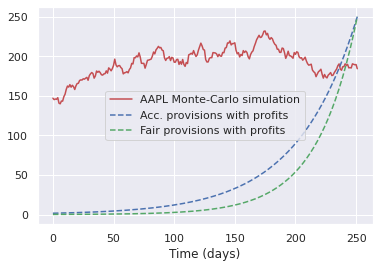

[12496.0209241848, 8421.63341106157]

In [ ]:
get_simulation('AAPL', 'apple_stocks')